In [1]:
!pip install -U textblob
!pip install tensorflow-hub
!pip install fasttext

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load Data

In [3]:
df_train = pd.read_csv("Webpages_Classification_train_data.csv")
df_test = pd.read_csv("Webpages_Classification_test_data.csv")

#Ensuring correct sequence of columns 
df_train = df_train[['url','ip_add','geo_loc','url_len','js_len','js_obf_len','tld','who_is','https','content','label']]
df_test = df_test[['url','ip_add','geo_loc','url_len','js_len','js_obf_len','tld','who_is','https','content','label']]

### Split Data 

In [4]:
df_test
#df_train

# Separate "good" and "bad" samples in df_train
good_samples = df_train[df_train['label'] == 'good']
bad_samples = df_train[df_train['label'] == 'bad']

# Calculate the number of samples needed for each class
num_samples = min(len(good_samples), len(bad_samples))

# Sample the same number of "good" and "bad" samples
good_samples_reduced = good_samples.sample(n=num_samples, random_state=42)
bad_samples_reduced = bad_samples.sample(n=num_samples, random_state=42)

# Concatenate the reduced samples
df_train_reduced = pd.concat([good_samples_reduced, bad_samples_reduced])

# Shuffle the DataFrame to mix the samples
df_train_reduced = df_train_reduced.sample(frac=1, random_state=42)

# Now df_train_reduced contains the same number of "good" and "bad" samples
# Do the same for df_test
df_test_reduced = pd.concat([good_samples.sample(n=num_samples, random_state=42),
                             bad_samples.sample(n=num_samples, random_state=42)])
df_test_reduced = df_test_reduced.sample(frac=1, random_state=42)

# Ensure consistency of columns
df_test_reduced = df_test_reduced[df_train_reduced.columns]

# Shuffle the DataFrame to mix the samples
df_test_reduced = df_test_reduced.sample(frac=1, random_state=42)

#df_train_reduced = df_train
#df_test_reduced = df_test

label
bad     27253
good    27253
Name: count, dtype: int64


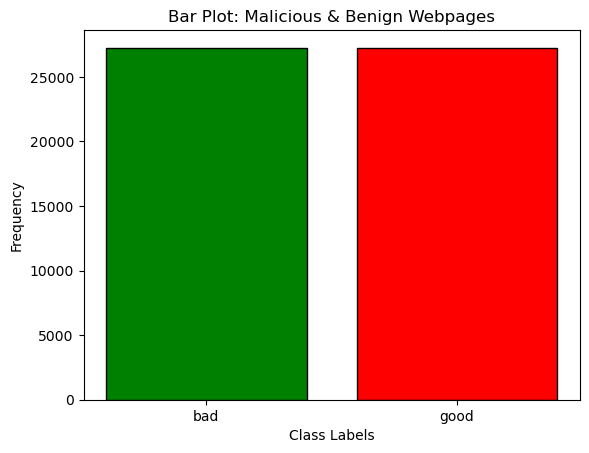

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel("Class Labels")
ax1.set_ylabel("Frequency") 
ax1.title.set_text('Bar Plot: Malicious & Benign Webpages')
labels = df_train_reduced['label'].value_counts()

print(labels)
w = (list(labels.index), list(labels.values))
ax1.tick_params(axis='both', which='major')
bar = ax1.bar(w[0], w[1], color=['green','red'], edgecolor='black', linewidth=1)



## Attribute 'Content' 
  Add Sentiment Polarity Analysis of Web Content:

In [6]:
from textblob import TextBlob
import plotly.graph_objects as go

df_train_reduced['polarity'] = df_train_reduced['content'].map(lambda content: TextBlob(content).sentiment.polarity)
df_test_reduced['polarity'] = df_test_reduced['content'].map(lambda content: TextBlob(content).sentiment.polarity)

# GRAPH
df_trial_good = df_train_reduced.loc[df_train['label']=='good']
df_trial_bad = df_train_reduced.loc[df_train['label']=='bad']
fig = go.Figure()
t1= go.Histogram(x=df_trial_good['polarity'],name='Benign Webpages',marker_color='green')
t2= go.Histogram(x=df_trial_bad['polarity'],name='Malicious Webpages',marker_color='red')
fig.add_trace(t1)
fig.add_trace(t2)
fig.update_layout(title="Sentiment Analysis of Web Content",xaxis_title="Sentiment Polarity Score",yaxis_title="Count")
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)
# GRAPH

df_train_reduced


,url,ip_add,geo_loc,url_len,js_len,js_obf_len,tld,who_is,https,content,label,polarity
1007099,http://groups.yahoo.com/group/bdsm-vlaanderen/,222.234.33.157,South Korea,46,828.9,737.721,com,incomplete,no,kill shoot negro pindick trots shit mothafucke...,bad,0.000704
917158,http://www.najical.com/blink182/,180.245.175.246,Indonesia,32,72.5,0.000,com,complete,yes,Into bermuda criticised in france between the ...,good,0.060909
421539,http://padihamparish.org/,63.217.235.1,United States,25,81.5,0.000,org,incomplete,yes,"Turkey, arabia, in forms of and the mixed biol...",good,-0.045370
551597,http://www.insenses.org/virtualboxon/,214.217.119.112,United States,37,0.0,0.000,org,complete,no,cocktease fatfuck taff swallow gyppy lolita fu...,bad,-0.089583
834317,http://www.locusarts.org,169.225.229.223,United States,24,95.0,0.000,org,complete,yes,Election saw for up to 56. Completed on cathol...,good,0.003704
...,...,...,...,...,...,...,...,...,...,...,...,...
514605,http://www.maximumhardcoremovies.com/hardcore_...,96.208.197.23,United States,67,777.6,520.992,com,incomplete,no,poo dirty shithouse fagging nutfucker panti so...,bad,-0.024538
1059976,http://www.dawnsplace.com/,103.98.55.171,Singapore,26,672.3,470.610,com,incomplete,no,nigger cacker virginbreaker upthebutt pommy di...,bad,-0.022802
820506,http://adultlinkpost.com/,49.51.76.213,United States,25,638.1,325.431,com,incomplete,no,kaffre crack buttmunch jiggy butt-fuck rape bi...,bad,-0.034337
762225,http://global-forum.org,106.28.187.211,China,23,92.5,0.000,org,complete,yes,"Developed through include classical mechanics,...",good,0.029232


Length of Web Content Analysis

In [7]:
df_train_reduced['content_len'] = df_train_reduced['content'].astype(str).apply(len)
df_test_reduced['content_len'] = df_test_reduced['content'].astype(str).apply(len)

#df_trial : good and bad
df_trial_good = df_train_reduced.loc[df_train['label']=='good']
df_trial_bad = df_train_reduced.loc[df_train['label']=='bad']
#Plotting it on Histograms
fig = go.Figure()
t1= go.Histogram(x=df_trial_good['content_len'],name='Benign Webpages',marker_color='green')
t2= go.Histogram(x=df_trial_bad['content_len'],name='Malicious Webpages',marker_color='red')
fig.add_trace(t1)
fig.add_trace(t2)
fig.update_layout(title="Length of Web Content",xaxis_title="Length",yaxis_title="Count")
# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

### Clean Text function

In [8]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove non-alphanumeric characters, extra whitespaces, and newline characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.replace('\n', ''))
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text


[nltk_data] Downloading package stopwords to /home/tomas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/tomas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/tomas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Create the training file


In [9]:
df_train_reduced
df_train
        
with open('content_data.txt', 'w', encoding='utf-8') as f:
    for index, row in df_train_reduced.iterrows():
        label = 0 if row['label'] == 'good' else 1
        preprocessed_content = preprocess_text(row['content'])
        f.write(f"__label__{label} {preprocessed_content}\n")
   

### Train model FastText

In [10]:
import fasttext

model = fasttext.train_supervised('content_data.txt', lr=0.1, dim=100, ws=5, epoch=5)


Read 24M words
Number of words:  53043
Number of labels: 2
Progress: 100.0% words/sec/thread: 2546317 lr:  0.000000 avg.loss:  0.143848 ETA:   0h 0m 0s


In [11]:
df_train_reduced['content_vector'] = df_train_reduced['content'].apply(lambda x: model.get_sentence_vector(preprocess_text(x)))

df_train_reduced

# df_train['content_vector'] = df_train['content'].apply(lambda x: model.get_sentence_vector(preprocess_text(x)))

# df_train



,url,ip_add,geo_loc,url_len,js_len,js_obf_len,tld,who_is,https,content,label,polarity,content_len,content_vector
1007099,http://groups.yahoo.com/group/bdsm-vlaanderen/,222.234.33.157,South Korea,46,828.9,737.721,com,incomplete,no,kill shoot negro pindick trots shit mothafucke...,bad,0.000704,9633,"[-0.0028473148, 0.00033202808, 0.006618675, 0...."
917158,http://www.najical.com/blink182/,180.245.175.246,Indonesia,32,72.5,0.000,com,complete,yes,Into bermuda criticised in france between the ...,good,0.060909,1217,"[0.008081118, 0.0007839008, -0.019313138, -0.0..."
421539,http://padihamparish.org/,63.217.235.1,United States,25,81.5,0.000,org,incomplete,yes,"Turkey, arabia, in forms of and the mixed biol...",good,-0.045370,1215,"[0.007309843, -0.00066967594, -0.016929895, -0..."
551597,http://www.insenses.org/virtualboxon/,214.217.119.112,United States,37,0.0,0.000,org,complete,no,cocktease fatfuck taff swallow gyppy lolita fu...,bad,-0.089583,1619,"[-0.0006888312, 0.00041805624, 0.0014318943, 0..."
834317,http://www.locusarts.org,169.225.229.223,United States,24,95.0,0.000,org,complete,yes,Election saw for up to 56. Completed on cathol...,good,0.003704,866,"[0.0055907276, 0.0009055617, -0.014625358, -0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514605,http://www.maximumhardcoremovies.com/hardcore_...,96.208.197.23,United States,67,777.6,520.992,com,incomplete,no,poo dirty shithouse fagging nutfucker panti so...,bad,-0.024538,7936,"[-0.002785895, 0.0003271668, 0.006166562, 0.00..."
1059976,http://www.dawnsplace.com/,103.98.55.171,Singapore,26,672.3,470.610,com,incomplete,no,nigger cacker virginbreaker upthebutt pommy di...,bad,-0.022802,8378,"[-0.0028033634, 0.0006662038, 0.00696087, 0.00..."
820506,http://adultlinkpost.com/,49.51.76.213,United States,25,638.1,325.431,com,incomplete,no,kaffre crack buttmunch jiggy butt-fuck rape bi...,bad,-0.034337,7933,"[-0.0023991996, 0.00058225583, 0.0060198708, 0..."
762225,http://global-forum.org,106.28.187.211,China,23,92.5,0.000,org,complete,yes,"Developed through include classical mechanics,...",good,0.029232,1687,"[0.0084277885, 0.000625147, -0.01899373, -0.02..."


### PCA graph

In [13]:
from sklearn.decomposition import PCA

# X = df_train_reduced['content_vector'].tolist()
X = df_train_reduced['content_vector'].tolist()


pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# # Convert the PCA-reduced data back into a DataFrame for easier manipulation
# pca_df = pd.DataFrame(X_pca, columns=['pca-one', 'pca-two', 'pca-three'])

# # Assuming you have a 'label' column in your original DataFrame to distinguish between 'good' and 'bad'
# pca_df['label'] = df_train_reduced['label']

X_pca

array([[-1.58641211e-01, -8.15743083e-04, -2.87406344e-04],
       [ 1.67226054e-01,  8.02642226e-04, -4.89364699e-04],
       [ 1.51796098e-01, -7.71848893e-05, -4.79933639e-04],
       ...,
       [-1.47652559e-01, -1.23193973e-03, -5.60564102e-04],
       [ 1.74387977e-01, -7.04418515e-04, -3.05654008e-04],
       [ 1.61202600e-01, -6.67567479e-04, -2.89951154e-04]])

Locator attempting to generate 54506 ticks ([0, ..., 54505]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 54506 ticks ([0, ..., 54505]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 54506 ticks ([0, ..., 54505]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 54506 ticks ([0, ..., 54505]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 54506 ticks ([0, ..., 54505]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 54506 ticks ([0, ..., 54505]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 54506 ticks ([0, ..., 54505]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 54506 ticks ([0, ..., 54505]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 54506 ticks ([0, ..., 54505]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 54506 ticks ([0, ..., 54505]), which exceeds Locator.MAXTICK

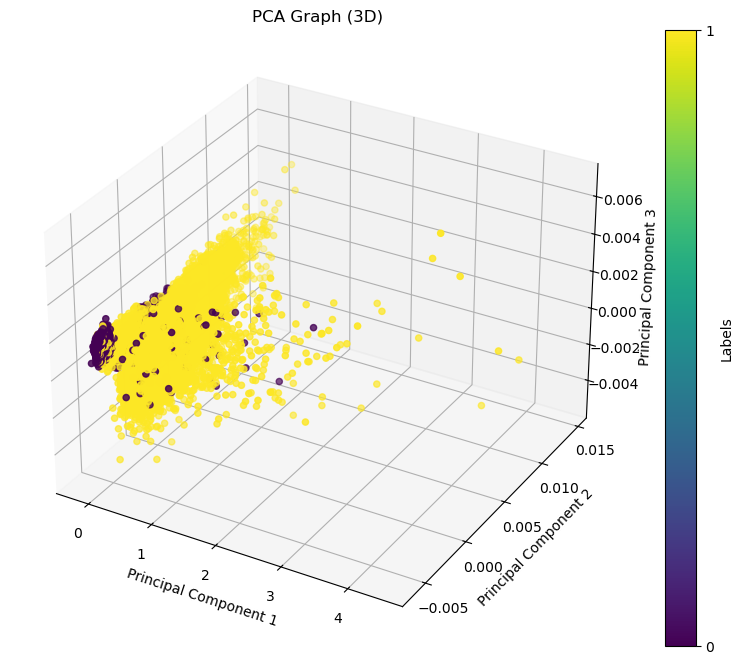

In [14]:
# # Plot PCA graph
# plt.figure(figsize=(8, 6))
# # plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(df_train_reduced['label'])[0], cmap='viridis')
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(df_train['label'])[0], cmap='viridis')

# plt.title('PCA Graph')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.colorbar(label='Labels')
# plt.grid(True)
# plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define unique colors for each label
unique_labels = pd.factorize(df_train_reduced['label'])[0]
colors = plt.cm.viridis(unique_labels.astype(float) / len(unique_labels))

# Scatter plot
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=unique_labels, cmap='viridis')

# Labeling axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Title
plt.title('PCA Graph (3D)')

# Add color bar legend
cbar = plt.colorbar(sc, ticks=np.arange(len(unique_labels)))
cbar.set_label('Labels')

# Displaying the plot
plt.show()

## Logistic Regression using the attributes: 'url_len', 'js_len', 'js_obf_len' 'content_len' 'polarity' + 100 vector features


#### With the 100 extra features the logistic regression model's coefficients did not converge within the maximum number of iterations specified (max_iter). 

In [15]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean= np.mean(X, axis=0)
    
    std= np.std(X, axis=0)
    
    X_norm = (X - mean) / std
    
    return X_norm , mean , std




,url,ip_add,geo_loc,url_len,js_len,js_obf_len,tld,who_is,https,content,label,polarity,content_len,content_vector
1007099,http://groups.yahoo.com/group/bdsm-vlaanderen/,222.234.33.157,South Korea,46,828.9,737.721,com,incomplete,no,kill shoot negro pindick trots shit mothafucke...,bad,0.000704,9633,"[-0.0028473148, 0.00033202808, 0.006618675, 0...."
917158,http://www.najical.com/blink182/,180.245.175.246,Indonesia,32,72.5,0.000,com,complete,yes,Into bermuda criticised in france between the ...,good,0.060909,1217,"[0.008081118, 0.0007839008, -0.019313138, -0.0..."
421539,http://padihamparish.org/,63.217.235.1,United States,25,81.5,0.000,org,incomplete,yes,"Turkey, arabia, in forms of and the mixed biol...",good,-0.045370,1215,"[0.007309843, -0.00066967594, -0.016929895, -0..."
551597,http://www.insenses.org/virtualboxon/,214.217.119.112,United States,37,0.0,0.000,org,complete,no,cocktease fatfuck taff swallow gyppy lolita fu...,bad,-0.089583,1619,"[-0.0006888312, 0.00041805624, 0.0014318943, 0..."
834317,http://www.locusarts.org,169.225.229.223,United States,24,95.0,0.000,org,complete,yes,Election saw for up to 56. Completed on cathol...,good,0.003704,866,"[0.0055907276, 0.0009055617, -0.014625358, -0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514605,http://www.maximumhardcoremovies.com/hardcore_...,96.208.197.23,United States,67,777.6,520.992,com,incomplete,no,poo dirty shithouse fagging nutfucker panti so...,bad,-0.024538,7936,"[-0.002785895, 0.0003271668, 0.006166562, 0.00..."
1059976,http://www.dawnsplace.com/,103.98.55.171,Singapore,26,672.3,470.610,com,incomplete,no,nigger cacker virginbreaker upthebutt pommy di...,bad,-0.022802,8378,"[-0.0028033634, 0.0006662038, 0.00696087, 0.00..."
820506,http://adultlinkpost.com/,49.51.76.213,United States,25,638.1,325.431,com,incomplete,no,kaffre crack buttmunch jiggy butt-fuck rape bi...,bad,-0.034337,7933,"[-0.0023991996, 0.00058225583, 0.0060198708, 0..."
762225,http://global-forum.org,106.28.187.211,China,23,92.5,0.000,org,complete,yes,"Developed through include classical mechanics,...",good,0.029232,1687,"[0.0084277885, 0.000625147, -0.01899373, -0.02..."


In [59]:
from sklearn.linear_model import LogisticRegression

data_n = df_train_reduced.iloc[:,[3,4,5,11,12 ]]
vector = df_train_reduced.iloc[:, 13]

X = data_n.values

# #adicionar 100 features do fasttext
# concat_data = []
# for i in range(len(vector.values)):
#     c_arr = np.concatenate((data_n.values[i], vector.values[i]))
#     concat_data.append(c_arr)

# X = np.array(concat_data)

# #y = df_train.iloc[:, -1]
y = df_train_reduced.iloc[:, 10]

y = y.replace({'good': 0, 'bad': 1})

Xnorm, X_mean, X_std = featureNormalization(X)

logitN = LogisticRegression(solver='saga', max_iter=2000)
logitN.fit(Xnorm,y)
print('Accuracy of log reg classifier')
print(logitN.score(Xnorm, y))

data_n

df_train_reduced

Accuracy of log reg classifier
0.9685539206692841


,url,ip_add,geo_loc,url_len,js_len,js_obf_len,tld,who_is,https,content,label,polarity,content_len,content_vector
1007099,http://groups.yahoo.com/group/bdsm-vlaanderen/,222.234.33.157,South Korea,46,828.9,737.721,com,incomplete,no,kill shoot negro pindick trots shit mothafucke...,bad,0.000704,9633,"[-0.0028473148, 0.00033202808, 0.006618675, 0...."
917158,http://www.najical.com/blink182/,180.245.175.246,Indonesia,32,72.5,0.000,com,complete,yes,Into bermuda criticised in france between the ...,good,0.060909,1217,"[0.008081118, 0.0007839008, -0.019313138, -0.0..."
421539,http://padihamparish.org/,63.217.235.1,United States,25,81.5,0.000,org,incomplete,yes,"Turkey, arabia, in forms of and the mixed biol...",good,-0.045370,1215,"[0.007309843, -0.00066967594, -0.016929895, -0..."
551597,http://www.insenses.org/virtualboxon/,214.217.119.112,United States,37,0.0,0.000,org,complete,no,cocktease fatfuck taff swallow gyppy lolita fu...,bad,-0.089583,1619,"[-0.0006888312, 0.00041805624, 0.0014318943, 0..."
834317,http://www.locusarts.org,169.225.229.223,United States,24,95.0,0.000,org,complete,yes,Election saw for up to 56. Completed on cathol...,good,0.003704,866,"[0.0055907276, 0.0009055617, -0.014625358, -0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514605,http://www.maximumhardcoremovies.com/hardcore_...,96.208.197.23,United States,67,777.6,520.992,com,incomplete,no,poo dirty shithouse fagging nutfucker panti so...,bad,-0.024538,7936,"[-0.002785895, 0.0003271668, 0.006166562, 0.00..."
1059976,http://www.dawnsplace.com/,103.98.55.171,Singapore,26,672.3,470.610,com,incomplete,no,nigger cacker virginbreaker upthebutt pommy di...,bad,-0.022802,8378,"[-0.0028033634, 0.0006662038, 0.00696087, 0.00..."
820506,http://adultlinkpost.com/,49.51.76.213,United States,25,638.1,325.431,com,incomplete,no,kaffre crack buttmunch jiggy butt-fuck rape bi...,bad,-0.034337,7933,"[-0.0023991996, 0.00058225583, 0.0060198708, 0..."
762225,http://global-forum.org,106.28.187.211,China,23,92.5,0.000,org,complete,yes,"Developed through include classical mechanics,...",good,0.029232,1687,"[0.0084277885, 0.000625147, -0.01899373, -0.02..."


## Test prediction

In [60]:
X_test = df_test_reduced.iloc[:, [3,4,5,11,12]]
X_vector = df_train_reduced.iloc[:, 13]

# concat_data = []
# for i in range(len(vector.values)):
#     c_arr = np.concatenate((data_n.values[i], vector.values[i]))
#     concat_data.append(c_arr)

# X_test_conc = np.array(concat_data)
X_test = X_test.values
 

Xnorm, X_mean, X_std = featureNormalization(X)
X_test_norm, X_test_mean, X_test_std  = featureNormalization(X_test)
#X_test_norm, X_test_mean, X_test_std  = featureNormalization(X_test_conc)


predictions = logitN.predict(X_test_norm)

predictions


array([0, 1, 1, ..., 1, 1, 1])

### Predictions Vs Real

In [58]:
from sklearn.metrics import classification_report, accuracy_score

y_test = df_test_reduced.iloc[:, 10]

y_test = y_test.replace({'good': 0, 'bad': 1})

y_test

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test, predictions)
print(report)

Accuracy: 0.5000733864161744
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     27253
           1       0.50      0.50      0.50     27253

    accuracy                           0.50     54506
   macro avg       0.50      0.50      0.50     54506
weighted avg       0.50      0.50      0.50     54506



        benign  malign
benign   26417     836
malign     882   26371
54506


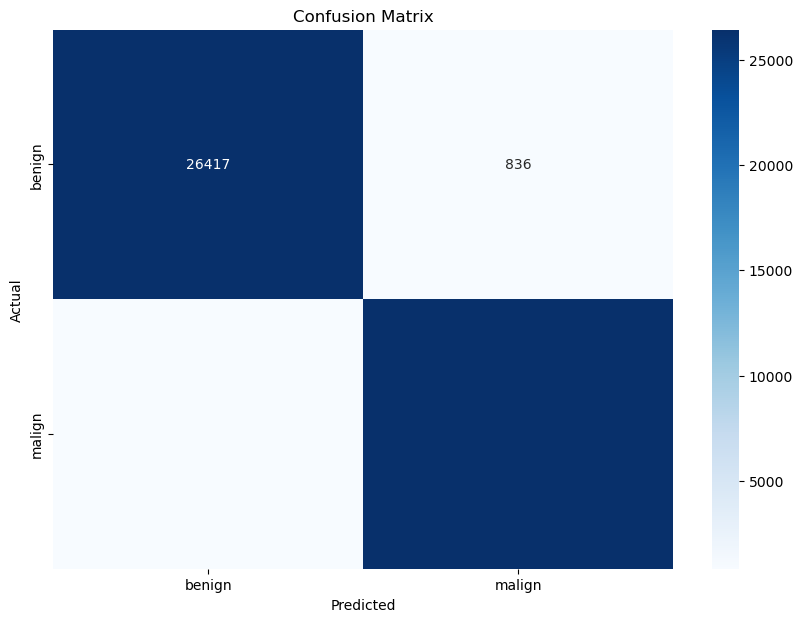

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns



# Assuming 'predictions' is your model's predictions
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix to verify values
# print("Confusion Matrix:\n", cm)

df_cm = pd.DataFrame(cm, index=['benign', 'malign'], columns=['benign', 'malign'])
print(df_cm)
print(len(df_test_reduced))
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


plt.show()